In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
from mplsoccer.pitch import Pitch 
import seaborn as sns 

In [10]:
# Read in the data
df = pd.read_csv('data/messibetis.csv')

In [11]:
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38


In [12]:
# Convert the distances to match the statsbomb Pitch
df['x'] = df['x'] * 1.2
df['y'] = df['y'] * 0.8
df['endX'] = df['endX'] * 1.2
df['endY'] = df['endY'] * 0.8

In [14]:
df.head()

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,60.0,40.0,Pass,Successful,48.0,34.4
1,messi,45,25,75.6,38.4,Pass,Successful,90.0,66.4
2,messi,46,4,88.8,46.4,Pass,Successful,85.2,52.0
3,messi,46,7,91.2,54.4,Pass,Successful,114.0,62.4
4,messi,46,55,120.0,0.8,Pass,Unsuccessful,115.2,30.4


Text(0.5, 1.0, 'Messi Pass Map vs Real Betis')

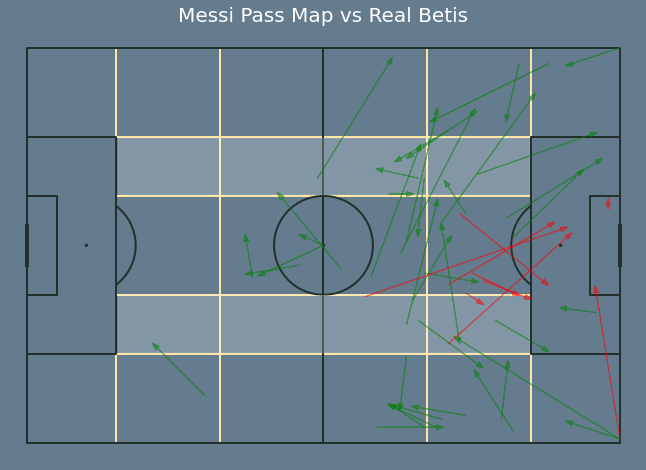

In [47]:
# Draw the pitch
fig, ax = plt.subplots(figsize=(13,8))
fig.set_facecolor('#657c8f')
ax.set_facecolor('#657c8f')

pitch = Pitch(pitch_type='statsbomb',orientation='horizontal', 
            pitch_color='#657c8f', line_color='#22312b', 
            positional=True, shade_middle=False, positional_color='#ffe5a8', shade_color='#f2f2f2',
            constrained_layout=True, tight_layout=False,
            axis=False, label=False, figsize=(13,8))

pitch.draw(ax=ax)
plt.gca().invert_yaxis() 

# Illuminate half-spaces
rect1 = plt.Rectangle((18.5, 18.5), 83, 11.5, color="white", alpha=0.2)
ax.add_patch(rect1)
rect2 = plt.Rectangle((18.5, 50.3), 83, 11.5, color="white", alpha=0.2)
ax.add_patch(rect2) 

# Draw Passes
for i in range(len(df['x'])):
    if df['outcome'][i] == 'Successful':
        dx = df['endX'][i] - df['x'][i]
        dy = df['endY'][i] - df['y'][i] 
        plt.arrow(df['x'][i], df['y'][i], dx, dy, head_width=1, color="green", alpha=0.5)
    if df['outcome'][i] == 'Unsuccessful':
        dx = df['endX'][i] - df['x'][i]
        dy = df['endY'][i] - df['y'][i] 
        plt.arrow(df['x'][i], df['y'][i], dx, dy, head_width=1, color="red", alpha=0.5)

plt.title('Messi Pass Map vs Real Betis', color='white', size=20)